___

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data - explore this ...

# what percent of the Age data is missing?

In [4]:
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [5]:
print('percentage is missing data: '+str(train['Age'].isnull().sum()/len(train['Age'])*100)+' %')

percentage is missing data: 19.865319865319865 %


# do data visualization -

## make a bar chart of the number of survivors by gender
## make a bar chart of the number of survivors by PClass
### make a histogram(bins = 30) and distribution plot of Age after dropping null values
### make a histogram of Fare 
and 
### any other graphs you find appropriate

Text(0, 0.5, 'number of survivors')

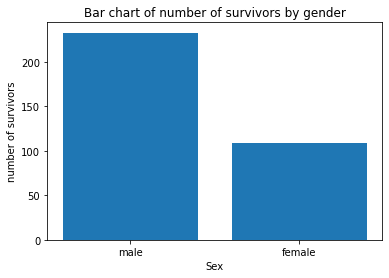

In [6]:
y=train.groupby(['Sex']).sum()['Survived']
x=train['Sex'].value_counts().keys()
plt.bar(x,y)
plt.title('Bar chart of number of survivors by gender')
plt.xlabel('Sex')
plt.ylabel('number of survivors')

Text(0, 0.5, 'number of survivors')

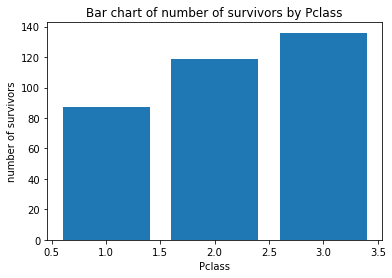

In [7]:
y=train.groupby(['Pclass']).sum()['Survived']
x=train['Pclass'].value_counts().keys()
plt.bar(x,y)
plt.title('Bar chart of number of survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('number of survivors')

Text(0.5, 1.0, 'Histogram of ages of passengers on Titanic')

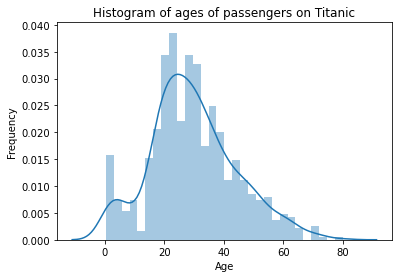

In [8]:
df=train['Age'].dropna()
sns.distplot(df,bins=30)
plt.ylabel('Frequency')
plt.title('Histogram of ages of passengers on Titanic')

Text(0.5, 1.0, 'Histogram of Titanic Fares')

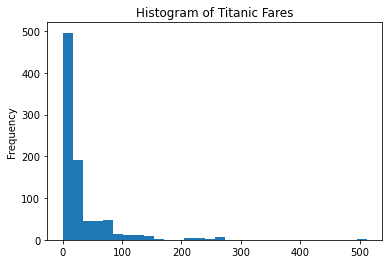

In [9]:
plt.hist(train['Fare'],bins=30);
plt.ylabel('Frequency')
plt.title('Histogram of Titanic Fares')

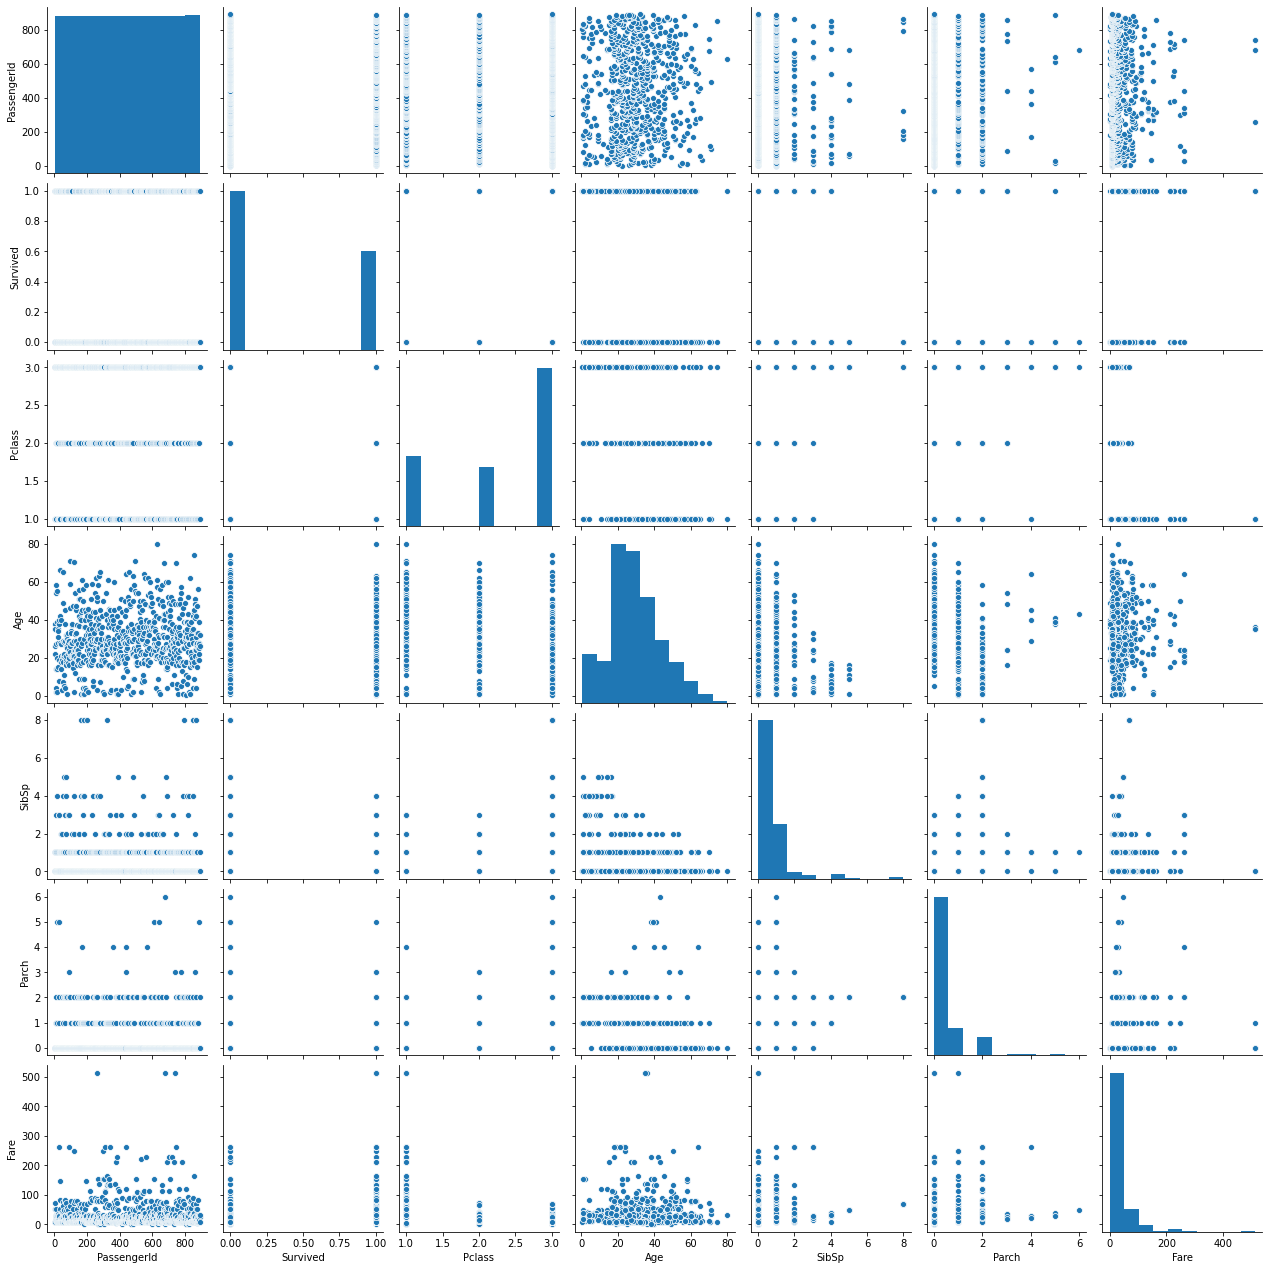

In [10]:
sns.pairplot(train)

([<matplotlib.patches.Wedge at 0x7fe618eef520>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')])

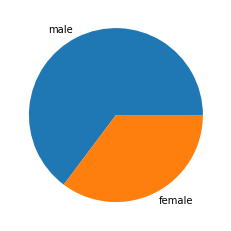

In [11]:
plt.pie(train['Sex'].value_counts(),labels=train['Sex'].value_counts().keys())

([<matplotlib.patches.Wedge at 0x7fe6198bb8e0>,
 [Text(-0.7128398214280037, 0.8377704870586525, 'S'),
  Text(0.4614522559226597, -0.9985298270476893, 'C'),
  Text(1.0595276168013974, -0.29563698894954155, 'Q')])

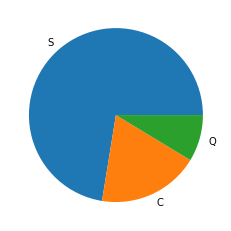

In [12]:
plt.pie(train['Embarked'].value_counts(),labels=train['Embarked'].value_counts().keys())

___
## Data Cleaning
 fill in missing age data by filling in the mean age of all the passengers .


In [13]:
def imputeAge(colList):
    age=colList[0]
    pclass=colList[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        elif pclass==3:
            return 25
    else:
        return age
train['Age']=train[['Age','Pclass']].apply(imputeAge,axis=1)
#train.isnull().sum()

## Make a box plot of x= Pclass and y = Age


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

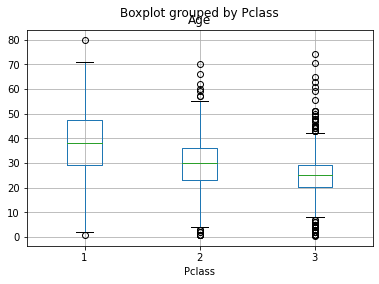

In [14]:
train.boxplot(['Age'],by='Pclass');
plt.tight_layout

## drop the Cabin column and the row in Embarked that is NaN.

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.dropna(inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features 

convert categorical features to dummy variables 

In [18]:
df=train.drop(['Name','Ticket'],axis=1)
dfnum=train[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]
dfcat=train[['Sex','Embarked']]

In [19]:
dfcat=pd.get_dummies(dfcat,drop_first=True)

In [20]:
train=pd.concat([dfnum, dfcat],axis=1)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### What is the average age by passengers?

In [22]:
train.groupby('Pclass').mean()['Age']

Pclass
1    38.090748
2    29.884946
3    25.101670
Name: Age, dtype: float64

#### your final data set should look something like this

In [23]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
#def imputeAge(colList):
#    age=colList[0]
#    pclass=colList[1]
#    if pd.isnull(age):
#       if pclass==1:
#            return 38
#        elif pclass==2:
#            return 30
##        elif pclass==3:
#            return 25
#    else:
#        return age
#df=train = pd.read_csv('titanic_train.csv')
#df['Age']=df[['Age','Pclass']].apply(imputeAge,axis=1)

In [25]:
#Two nulls in embark
#df.dropna(inplace=True)#If any stray null values remove them as a precaution

### Logistical Regression is beter suited for this data set

## Starting logistic regression because the output value in this dataset is a categorical value
## Not  a continuous value so linear regression would be teh wrong chouce for machine learning

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:

X=train.drop('Survived',axis=1)
y=train['Survived']

In [28]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=.3,random_state=101)

In [29]:
# make an object of the calss LogisticRegression
logr=LogisticRegression()

### In the FIT method we will do the actual machine learning training will place

In [30]:
logr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
logr.coef_

array([[ 8.63961415e-04, -3.16379696e-01, -5.71835766e-03,
        -5.64442516e-02, -3.08836955e-01,  1.10224486e-02,
        -2.36848656e+00,  1.31231868e-01,  8.04273163e-02]])

In [33]:
ypredict=logr.predict(X_test)
ypredict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1])

In [34]:
y_test.values

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0])

# Evaluation

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,ypredict))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.81      0.63      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,ypredict)

array([[148,  15],
       [ 38,  66]])